In [ ]:
import numpy as np

# Parameters
n = 5  # Number of particles
D = 3  # Dimensions (3D space)
dt = 0.01  # Time step

# Arrays of variables
r = 100.0 * np.random.rand(n, D)  # Initialize random positions
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initialize random velocities

# Update subroutine to update positions based on velocities
def update(r, v, dt):
    new_r = r + v * dt  # Update positions
    return new_r

# Simulation loop
for i in range(100):
    r = update(r, v, dt)  # Update positions
    print(f"Step {i+1}")
    print(f"Positions:\n{r}\n")

print("Final positions:\n", r)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

# Parameters
n = 5   # Number of particles
D = 3   # Dimensions (3D space)
LL = 100  # Box size
dt = 0.01  # Time step
BC = 1 # Apply periodic boundary conditions (0)

# Set dimensions of the system. For simplicity, all dimensions set to LL
L = np.zeros([D]) + LL

# Arrays of variables
r = LL * np.random.rand(n, D)  # Initialize random positions
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initialize random velocities

def update(r, v, dt, L, BC=1):
    """
    Update the positions and velocities, applying the chosen boundary condition.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    a  -- accelerations array (for future use)
    dt -- time step
    L  -- system size (box dimensions)
    BC -- boundary condition flag: 0 for periodic, 1 for reflective
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    # Update positions based on current velocity
    newr = r + v * dt
    
    # Initialize new velocities
    newv = 1.0 * v  # Copy of velocity array
    
    # Apply periodic boundary conditions if BC == 0
    if BC == 0:
        newr = newr % L  # Wrap particles around if they exceed boundaries
    
    # Apply reflective boundary conditions if BC == 1
    elif BC == 1:
        newr, newv = reflectBC(newr, v, L)  # Reflect at the boundaries
    
    return newr, newv

# Reflective boundary condition function
def reflectBC(r, v, L):
    """
    Apply reflective boundary conditions.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    L  -- system size (box dimensions)
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    newv = 1.0 * v
    newr = 1.0 * r
    for i in range(n):  # Loop over all particles
        for j in range(D):  # Loop over all dimensions
            if r[i][j] < 0:  # If particle is out of bounds on the lower side
                newr[i][j] = -newr[i][j]  # Reflect position
                newv[i][j] = abs(v[i][j])  # Reverse velocity direction (positive)
            if r[i][j] > L[j]:  # If particle is out of bounds on the upper side
                newr[i][j] = 2.0 * L[j] - newr[i][j]  # Reflect position
                newv[i][j] = -abs(v[i][j])  # Reverse velocity direction (negative)
    
    return newr, newv

# Plot function to display the particle positions in 3D
def plot_particles(r):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each particle as a point
    ax.scatter(r[:, 0], r[:, 1], r[:, 2], c='r', marker='o')
    
    # Set plot limits to the box size
    ax.set_xlim([0, LL])
    ax.set_ylim([0, LL])
    ax.set_zlim([0, LL])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

# Simulation loop
for i in range(100):
    r, v = update(r, v, dt, L, BC=1)  # Update positions
    display.clear_output(wait=True)  # Clear the previous output
    plot_particles(r)  # Plot the new positions
    plt.pause(0.1)  # Pause to create animation effect

print("Final positions:\n", r)

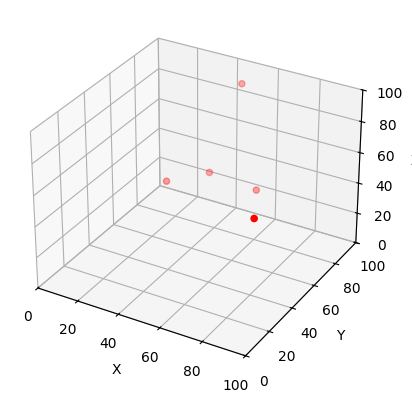

Final positions:
 [[43.43681113 97.77564849 86.04950131]
 [89.10748614 25.80166    63.22204787]
 [40.99957758 73.94191352 41.83880668]
 [62.08808052 77.7621856  35.64331557]
 [28.015284   59.42835258 40.64980025]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os

# Parameters
n = 5   # Number of particles
D = 3   # Dimensions (3D space)
LL = 100  # Box size
dt = 0.01  # Time step

# Set dimensions of the system. For simplicity, all dimensions set to LL
L = np.zeros([D]) + LL

# Initialize random positions and velocities
r = LL * np.random.rand(n, D)
v = 100.0 * (np.random.rand(n, D) - 0.5)

# Update subroutine
def update(r, v, dt, L, BC=0):
    """
    Update the positions and velocities, applying the chosen boundary condition.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    dt -- time step
    L  -- system size (box dimensions)
    BC -- boundary condition flag: 0 for periodic, 1 for reflective
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    # Update positions based on current velocity
    newr = r + v * dt
    
    # Initialize new velocities
    newv = 1.0 * v  # Copy of velocity array
    
    # Apply periodic boundary conditions if BC == 0
    if BC == 0:
        newr = newr % L  # Wrap particles around if they exceed boundaries
    
    # Apply reflective boundary conditions if BC == 1
    elif BC == 1:
        newr, newv = reflectBC(newr, v, L)  # Reflect at the boundaries
    
    return newr, newv

# Reflective boundary condition function
def reflectBC(r, v, L):
    """
    Apply reflective boundary conditions.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    L  -- system size (box dimensions)
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    newv = 1.0 * v
    newr = 1.0 * r
    for i in range(n):  # Loop over all particles
        for j in range(D):  # Loop over all dimensions
            if r[i][j] < 0:  # If particle is out of bounds on the lower side
                newr[i][j] = -newr[i][j]  # Reflect position
                newv[i][j] = abs(v[i][j])  # Reverse velocity direction (positive)
            if r[i][j] > L[j]:  # If particle is out of bounds on the upper side
                newr[i][j] = 2.0 * L[j] - newr[i][j]  # Reflect position
                newv[i][j] = -abs(v[i][j])  # Reverse velocity direction (negative)
    
    return newr, newv



def dump(r, t, L):
    """
    Dump particle positions for visualization.
    
    Parameters:
    r -- positions array (n, D)
    t -- current timestep
    L -- system size (box dimensions)
    """
    # Ensure the 'dumps' directory exists
    if not os.path.exists("dumps"):
        os.makedirs("dumps")
    
    # Create the filename for the current timestep
    fname = "dumps/t" + str(t) + ".dump"
    
    with open(fname, "w") as f:
        # Write the timestep information
        f.write("ITEM: TIMESTEP\n")
        f.write(str(t) + "\n")  # timestep
        
        # Write the number of atoms
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(str(len(r)) + "\n")  # number of atoms
        
        # Write the box bounds
        f.write("ITEM: BOX BOUNDS pp pp pp\n")  # pp = periodic BCs
        f.write("0 " + str(L[0]) + "\n")
        f.write("0 " + str(L[1]) + "\n")
        f.write("0 " + str(L[2]) + "\n")
        
        # Write the atom positions
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i+1} {i+1} 1 {r[i][0]} {r[i][1]} {r[i][2]}\n")


# Plot function to display the particle positions in 3D
def plot_particles(r):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each particle as a point
    ax.scatter(r[:, 0], r[:, 1], r[:, 2], c='r', marker='o')
    
    # Set plot limits to the box size
    ax.set_xlim([0, LL])
    ax.set_ylim([0, LL])
    ax.set_zlim([0, LL])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

# Simulation loop
for i in range(100):
    r, v = update(r, v, dt, L, BC=1)  # Update positions and apply boundary conditions
    dump(r, int(i), L)  # Dump the positions for visualization
    display.clear_output(wait=True)  # Clear the previous output
    plot_particles(r)  # Plot the new positions
    plt.pause(0.1)  # Pause to create animation effect

print("Final positions:\n", r)

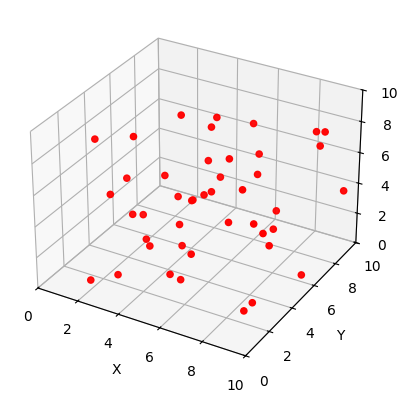

KeyboardInterrupt: 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os

# Update subroutine
def update(r, v, dt, n, D, L, BC=0):
    """
    Update the positions and velocities, applying the chosen boundary condition.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    dt -- time step
    L  -- system size (box dimensions)
    BC -- boundary condition flag: 0 for periodic, 1 for reflective
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    # Update positions based on current velocity
    newr = r + v * dt
    
    # Initialize new velocities
    newv = 1.0 * v  # Copy of velocity array
    
    # Apply periodic boundary conditions if BC == 0
    if BC == 0:
        newr = newr % L  # Wrap particles around if they exceed boundaries
    
    # Apply reflective boundary conditions if BC == 1
    elif BC == 1:
        newr, newv = reflectBC(newr, v, n, D, L)  # Reflect at the boundaries
    
    return newr, newv

# Reflective boundary condition function
def reflectBC(r, v, n, D, L):
    """
    Apply reflective boundary conditions.
    
    Parameters:
    r  -- positions array
    v  -- velocities array
    L  -- system size (box dimensions)
    
    Returns:
    newr -- updated positions
    newv -- updated velocities
    """
    newv = 1.0 * v
    newr = 1.0 * r
    for i in range(n):  # Loop over all particles
        for j in range(D):  # Loop over all dimensions
            if r[i][j] < 0:  # If particle is out of bounds on the lower side
                newr[i][j] = -newr[i][j]  # Reflect position
                newv[i][j] = abs(v[i][j])  # Reverse velocity direction (positive)
            if r[i][j] > L[j]:  # If particle is out of bounds on the upper side
                newr[i][j] = 2.0 * L[j] - newr[i][j]  # Reflect position
                newv[i][j] = -abs(v[i][j])  # Reverse velocity direction (negative)
    
    return newr, newv



def dump(r, t, L, tp):
    """
    Dump particle positions for visualization.
    
    Parameters:
    r -- positions array (n, D)
    t -- current timestep
    L -- system size (box dimensions)
    """
    # Ensure the 'dumps' directory exists
    if not os.path.exists("dumps"):
        os.makedirs("dumps")
    
    # Create the filename for the current timestep
    fname = "dumps/t" + str(t) + ".dump"
    
    with open(fname, "w") as f:
        # Write the timestep information
        f.write("ITEM: TIMESTEP\n")
        f.write(str(t) + "\n")  # timestep
        
        # Write the number of atoms
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(str(len(r)) + "\n")  # number of atoms
        
        # Write the box bounds
        f.write("ITEM: BOX BOUNDS pp pp pp\n")  # pp = periodic BCs
        f.write("0 " + str(L[0]) + "\n")
        f.write("0 " + str(L[1]) + "\n")
        f.write("0 " + str(L[2]) + "\n")
        
        # Write the atom positions
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i+1} {i+1} {tp[i]} {r[i][0]} {r[i][1]} {r[i][2]}\n")

def dLJp(r, i, sig, eps, cutoff=None):
    """
    Calculate the force due to the Lennard-Jones potential on particle i.
    
    Parameters:
    r       -- positions array (n, D) where n is the number of particles and D is the number of dimensions
    i       -- index of the particle for which the force is calculated
    sig     -- sigma parameter for the Lennard-Jones potential
    eps     -- epsilon parameter for the Lennard-Jones potential
    cutoff  -- cutoff distance beyond which interactions are ignored (optional)
    
    Returns:
    dLJP -- force vector on particle i due to all other particles
    """
    drv = r - r[i]  # Calculate distance vectors between particle i and all others
    drv = np.delete(drv, i, axis=0)  # Remove self-interaction

    # Compute absolute distances (Euclidean norm)
    dr = np.linalg.norm(drv, axis=1)


    
    # Apply cutoff if provided
    if cutoff is not None:
        mask = dr < cutoff  # Only consider distances within the cutoff
        drv = drv[mask]
        dr = dr[mask]
    
    # Avoid division by zero (or very small distances)
    small_cutoff = 1e-12
    dr = np.clip(dr, small_cutoff, None)

    # Calculate r^(-8) and r^(-14) terms for the Lennard-Jones force
    r8 = (sig / dr)**8
    r14 = 2.0 * (sig / dr)**14

    # Force magnitude calculation
    r814 = r14 - r8
    
    # Multiply distance vectors by the force magnitudes
    r814v = drv * r814[:, np.newaxis]  # Broadcasting for element-wise multiplication

    # Sum all forces acting on particle i
    dLJP = 24.0 * eps * np.sum(r814v, axis=0)
    
    return dLJP


def plot_particles(r, L):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(r[:, 0], r[:, 1], r[:, 2], c='r', marker='o')
    ax.set_xlim([0, L[0]])
    ax.set_ylim([0, L[1]])
    ax.set_zlim([0, L[2]])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def updatev(r, v, dt, sig, epsi, m, cutoff=None):
    """
    Update velocities using the specified potential with a cutoff.

    Parameters:
    r         -- positions array (n, D) where n is the number of particles and D is the number of dimensions
    v         -- velocities array (n, D)
    dt        -- time step
    potential -- potential object (must implement force_ana method)
    m         -- mass of particles (array of shape (n,))
    cutoff    -- cutoff distance beyond which interactions are ignored (optional)

    Returns:
    newv -- updated velocities
    a    -- acceleration (force/mass)
    """
    n, D = r.shape  # Number of particles and dimensions

    # Initialize force array
    F = np.zeros_like(r)

    # Compute forces for each particle
    for i in range(n):
        F[i] = dLJp(r, i, sig, epsi, cutoff)  # Call force to compute force on particle i

    # Reshape mass array to allow broadcasting
    m = m[:, np.newaxis]  # Shape becomes (n, 1) to align with (n, D)

    # Compute acceleration: a = F / m (broadcasted correctly)
    a = F / m

    # Update velocities: v(t+dt) = v(t) + a(t) * dt
    newv = v + a * dt

    return newv, a

def rescaleT(v, T_target, m, R=8.3144621):
    """
    Rescale velocities to achieve the target temperature using the universal gas constant R.
    
    Parameters:
    v        -- velocities array (n, D) in nm^2/ps^2, where n is the number of particles and D is the number of dimensions
    T_target -- the target temperature (in Kelvin)
    m        -- mass of particles in atomic units u (array of shape (n,))
    R        -- Universal gas constant in kJ/mol/K (default is 8.3144621)
    
    Returns:
    v_new -- rescaled velocities to achieve the target temperature
    """
    # Ensure m is an array of masses for all particles
    m = np.asarray(m)
    
    # Compute the total kinetic energy of the system
    # Kinetic energy for each particle is 1/2 m_i v_i^2, and we sum it over all particles
    KE = 0.5 * np.sum(m[:, np.newaxis] * v**2)  # Total kinetic energy in u * nm^2/ps^2 = kJ/mol: sum(1/2 m v^2)
    
    # Compute the current temperature using the gas constant R
    T_now = (2.0 / (3 * R)) * KE  #  T = (2/3 R) * KE

    print(f"Step {i}, Temperature: {T_now}")
    
    # Rescaling factor
    lam = np.sqrt(T_target / T_now)
    
    # Update velocities: rescale the velocity of each particle
    v_new = lam * v
    
    return v_new


# Constants based on GROMACS units
kb = 0.0083144621  # Boltzmann constant in kJ/(mol·K)
amu = 1.0  # Atomic mass unit (u)
time_unit = 1.0  # Time in picoseconds (ps)
length_unit = 1.0  # Length in nanometers (nm)
energy_unit = 1.0  # Energy in kilojoules per mole (kJ/mol)

# Parameters
n = 50   # Number of particles
D = 3     # Dimensions (3D space)
LL = 10.0  # Box size in nanometers
dt = 0.01  # Time step in picoseconds

# Lennard-Jones parameters (GROMACS units)
# https://www.sciencedirect.com/science/article/pii/S0378381207005912?via%3Dihub#fig1
sig_O = 0.31169 # Sigma for Oxygen in nm
sig_H = 0.0098  # Sigma for Hydrogen in nm
eps_O = 0.6287  # Epsilon for Oxygen in kJ/mol
eps_H = 0.0324  # Epsilon for Hydrogen in kJ/mol

# Masses for Oxygen and Hydrogen in atomic mass units (amu)
m_O = 16.0  # Mass of oxygen atom in amu
m_H = 1.0   # Mass of hydrogen atom in amu
m = [m_H, m_O]  # Masses for two types of particles: [H, O]

# Initialize particle types array (first half H, second half O)
tp = [1] * n
#for i in range(n):
#    tp[i] = 0 if i < n / 2 else 1

# Create mass lookup table based on particle types
mm = np.array([m[tp[j]] for j in range(n)])

# Print mass lookup table
print("Particle types:", tp)
print("Mass lookup table (amu):", mm)

# Cutoff for Lennard-Jones interactions (use the larger sigma)
cutoff = 2.5 * max(sig_O, sig_H)

# Target temperature (in Kelvin)
T_target  = 30.0  # Room temperature ~ 300 K

# Set dimensions of the system. For simplicity, all dimensions set to LL (in nanometers)
L = np.zeros([D]) + LL

# Initialize random positions (in nanometers) and velocities (in nm/ps)
r = LL * np.random.rand(n, D) 
v = 10 * (np.random.rand(n, D) - 0.5)  # Initial random velocities in nm/ps

# Simulation loop
for i in range(1000):
    # 1. Update velocities based on forces (Lennard-Jones potential)
    v, a = updatev(r, v, dt, sig_O, eps_O, mm, cutoff=cutoff)  # Assume O-O interactions
    
    # 2. Rescale velocities to maintain target temperature
    #v = rescaleT(v, T_target, mm)

    # 3. Update positions using velocity and handle boundary conditions
    r, v = update(r, v, dt, n, D, L, BC=1)  # Update positions with reflective boundaries
    
    # 4. Dump the positions for visualization
    dump(r, int(i), L, tp)
    
    # 5. (Optional) Clear and plot the updated positions for real-time visualization
    display.clear_output(wait=True)
    plot_particles(r, L)
    plt.pause(0.1)  # Pause to create animation effect

# Final output of positions
print("Final positions:\n", r)

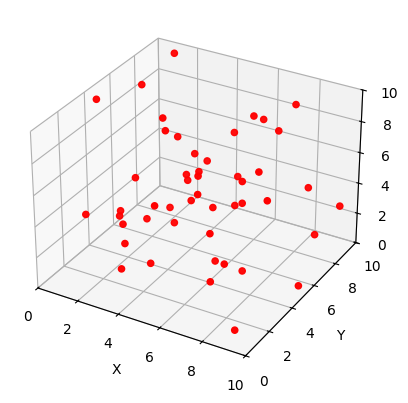

KeyboardInterrupt: 

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os

# Constants based on GROMACS units
kb = 0.0083144621  # Boltzmann constant in kJ/(mol·K)
amu = 1.0  # Atomic mass unit (u)
time_unit = 1.0  # Time in picoseconds (ps)
length_unit = 1.0  # Length in nanometers (nm)
energy_unit = 1.0  # Energy in kilojoules per mole (kJ/mol)

# Parameters
n = 50   # Number of particles
D = 3    # Dimensions (3D space)
LL = 10.0  # Box size in nanometers
dt = 0.001  # Time step in picoseconds

# Lennard-Jones parameters for Helium (He) and Argon (Ar) in GROMACS units
sig_He = 0.2573  # Sigma for Helium in nm
sig_Ar = 0.3405  # Sigma for Argon in nm
eps_He = 0.084   # Epsilon for Helium in kJ/mol 820.
eps_Ar = 0.997   # Epsilon for Argon in kJ/mol

# Masses for Helium and Argon in atomic mass units (amu)
m_He = 4.0026  # Mass of Helium atom in amu
m_Ar = 39.948  # Mass of Argon atom in amu
m = [m_He, m_Ar]  # Masses for two types of particles: [He, Ar]

# Initialize particle types array (first half He, second half Ar)
tp = [0 if i < n / 2 else 1 for i in range(n)]

# Create mass lookup table based on particle types
mm = np.array([m[tp[j]] for j in range(n)])

# Print mass lookup table
print("Particle types:", tp)
print("Mass lookup table (amu):", mm)

# Cutoff for Lennard-Jones interactions (use the larger sigma)
cutoff = 2.5 * max(sig_He, sig_Ar)

# Target temperature (in Kelvin)
T_target = 300.0  # Room temperature ~ 300 K

# Set dimensions of the system. For simplicity, all dimensions set to LL (in nanometers)
L = np.zeros([D]) + LL

# Initialize random positions (in nanometers) and velocities (in nm/ps)
r = LL * np.random.rand(n, D) 
v = 1000 * (np.random.rand(n, D) - 0.5)  # Initial random velocities in nm/ps

# Simulation loop
for i in range(1000):
    # 1. Update velocities based on forces (Lennard-Jones potential)
    v, a = updatev(r, v, dt, sig_He, eps_He, mm, cutoff=cutoff)  # Assume He-He interactions initially
    
    # 2. Rescale velocities to maintain target temperature
    #v = rescaleT(v, T_target, mm)

    # 3. Update positions using velocity and handle boundary conditions
    r, v = update(r, v, dt, n, D, L, BC=1)  # Update positions with reflective boundaries
    
    # 4. Dump the positions for visualization
    dump(r, int(i), L, tp)
    
    # 5. (Optional) Clear and plot the updated positions for real-time visualization
    display.clear_output(wait=True)
    plot_particles(r, L)
    plt.pause(0.1)  # Pause to create animation effect

# Final output of positions
print("Final positions:\n", r)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from playground.MD import update, dump, plot_particles, updatev, rescaleT

# Parameters
n = 100   # Number of particles
D = 3     # Dimensions (3D space)
LL = 100  # Box size
dt = 0.0001  # Time step
sig = 1.0  # Lennard-Jones sigma
eps = 1.0  # Lennard-Jones epsilon

m = [1.0, 10.0]  # Masses for two types of particles

# Initialize particle types array
tp = [0] * n

# Assign types: first half are type 0, second half are type 1
for i in range(n):
    tp[i] = 0 if i < n / 2 else 1

# Create mass lookup table based on particle types
mm = np.array([m[tp[j]] for j in range(n)])

# Print mass lookup table
print("Particle types:", tp)
print("Mass lookup table:", mm)

cutoff = 2.5 * sig  # Cutoff for Lennard-Jones interactions
T_target = 10000.0  # Target temperature
kb = 1.0  # Boltzmann constant (for simplicity)

# Set dimensions of the system. All dimensions set to LL
L = np.zeros([D]) + LL

# Initialize random positions and velocities
r = LL * np.random.rand(n, D)
v = 10000.0 * (np.random.rand(n, D) - 0.5)

# Simulation loop
for i in range(1000):
    # 1. Update velocities based on forces (Lennard-Jones potential)
    v, a = updatev(r, v, dt, sig, eps, mm, cutoff=None)
    
    # 2. Rescale velocities to maintain target temperature
    v = rescaleT(v, T_target, mm, kb)

    # 3. Update positions using velocity and handle boundary conditions
    r, v = update(r, v, dt, n, D, L, BC=1)  # Update positions with reflective boundaries
    
    # 4. Dump the positions for visualization
    dump(r, int(i), L, tp)
    
    ## 5. (Optional) Clear and plot the updated positions for real-time visualization
    # display.clear_output(wait=True)
    # plot_particles(r, LL)
    # plt.pause(0.1)  # Pause to create animation effect

# Final output of positions
print("Final positions:\n", r)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from playground.MD import update, dump, plot_particles, updatev, rescaleT
from potential.D1 import LennardJones

# Constants
amu_to_kg = 1.66054e-27  # Atomic mass unit to kg
kJmol_to_J = 1.66054e-21  # kJ/mol to Joules

# Parameters
n = 100   # Number of particles
D = 3     # Dimensions (3D space)
LL = 100  * 1e-10 # Box size in meters
dt = 0.0001  # Time step in seconds

# Lennard-Jones parameters
sig_O = 3.0e-10  # Sigma for Oxygen in meters
sig_H = 2.5e-10  # Sigma for Hydrogen in meters
eps_O = 0.2 * kJmol_to_J  # Epsilon for Oxygen in Joules
eps_H = 0.01 * kJmol_to_J  # Epsilon for Hydrogen in Joules

# Masses for Oxygen and Hydrogen in kilograms
m_O = 16 * amu_to_kg  # Mass of oxygen atom
m_H = 1 * amu_to_kg    # Mass of hydrogen atom
m = [m_H, m_O]  # Masses for two types of particles: [H, O]

# Initialize particle types array (first half H, second half O)
tp = [0] * n
for i in range(n):
    tp[i] = 0 if i < n / 2 else 1

# Create mass lookup table based on particle types
mm = np.array([m[tp[j]] for j in range(n)])

# Print mass lookup table
print("Particle types:", tp)
print("Mass lookup table (kg):", mm)

# Cutoff for Lennard-Jones interactions
cutoff = 2.5 * max(sig_O, sig_H)  # Use the larger sigma for the cutoff

# Target temperature (in Kelvin)
T_target = 600.0  # Room temperature ~ 300 K
kb = 1.380649e-23  # Boltzmann constant in J/K

# Set dimensions of the system. For simplicity, all dimensions set to LL (in meters)
L = np.zeros([D]) + LL  # Convert box size to meters

# Initialize random positions (in meters) and velocities (in m/s)
r = LL * np.random.rand(n, D) 
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initial random velocities (in m/s)

potential = LennardJones([eps_O, sig_O])

# Simulation loop
for i in range(1000):
    # 1. Update velocities based on forces (Lennard-Jones potential)
    v, a = updatev(r, v, dt, potential, mm, cutoff=cutoff)  # Assume O-O interactions
    
    # 2. Rescale velocities to maintain target temperature
    v = rescaleT(v, T_target, mm, kb)

    # 3. Update positions using velocity and handle boundary conditions
    r, v = update(r, v, dt, n, D, L, BC=1)  # Update positions with reflective boundaries
    
    # 4. Dump the positions for visualization
    dump(r, int(i), L, tp)
    
    # 5. (Optional) Clear and plot the updated positions for real-time visualization
    # display.clear_output(wait=True)
    # plot_particles(r, LL)
    # plt.pause(0.1)  # Pause to create animation effect

# Final output of positions
print("Final positions:\n", r)

Particle types: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Mass lookup table (kg): [1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27
 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27
 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27
 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27
 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27
 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27
 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27
 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27
 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27
 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27 1.660540e-27

In [ ]:
from playground.MD import updatev
import numpy as np
# Example parameters
n = 5  # Number of particles
D = 3  # Dimensions
sig = 1.0  # Lennard-Jones sigma
eps = 1.0  # Lennard-Jones epsilon
m = 1.0  # Mass of particles
dt = 0.01  # Time step
cutoff = 2.5 * sig  # Typical cutoff distance in Lennard-Jones systems

# Initialize positions and velocities
r = np.random.rand(n, D) * 100
v = np.random.rand(n, D) - 0.5

# Update velocities and accelerations with cutoff
newv, a = updatev(r, v, dt, sig, eps, m, cutoff=None)
print("Updated velocities:\n", newv)
print("Accelerations:\n", a)